In [1]:
import os
import json
import matplotlib.pyplot as plt

def load_json_files(directory):
    data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                try:
                    data[filename] = json.load(file)
                except json.JSONDecodeError:
                    print(f"Error decoding JSON from file: {filename}")
    return data

In [2]:
import re

def plot_data(data, plot_title, job_type):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    i=2
    x = []
    y = []
    y2 = []
    ndata = {}
    all_client_data = {}
    
    for type_of_run, run_dict in data.items():
        #if type_of_run == "multinode_reads_1_file" or type_of_run == "multinode
        for key, json_dict in run_dict.items():
            #print(key, json_dict['client_stats'][0]['write']['bw'])
            result = re.split(r'[.]\s*', key)
            if len(json_dict['client_stats']) > 1:
                
                for j in range (0,len(json_dict['client_stats'])):
                    if json_dict['client_stats'][j]['jobname'] == 'All clients':
                        all_client_data[result[0]] = json_dict['client_stats'][j]
                node_count = len(json_dict['client_stats']) - 1
                IOPS = all_client_data[result[0]][job_type]['iops']
                ndata[result[0]] = [all_client_data[result[0]][job_type]['bw']/1024, node_count, IOPS]
            elif len(json_dict['client_stats']) == 1:
                
                all_client_data[result[0]] = json_dict['client_stats']
                node_count = len(json_dict['client_stats'])
                IOPS = all_client_data[result[0]][0][job_type]['iops']
                ndata[result[0]] = [all_client_data[result[0]][0][job_type]['bw']/1024, node_count, IOPS]
    
        # Sort the dictionary by values (using itemgetter or a lambda function)
        sorted_data = sorted(ndata.items(), key=lambda item: item[1][0])

        # Convert sorted items back to dictionary if needed
        sorted_dict = dict(sorted_data)
        #print(sorted_dict)
        for key, value in sorted_dict.items():
            x.append(value[1])
            y.append(value[0])
            y2.append(value[2])
            i += 2

        ax.plot(x, y, 'o', label=type_of_run)

        ax2.plot(x, y2, 'o', label='IOPS')
    
        ax2.set_ylabel("IOPS")
        
        ndata = {}
        x = []
        y = []
        y2 = []
        i = 2
        
    ax.set_xlabel('Node count')  # Customize your x-axis label here
    ax.set_ylabel('MB/s')  # Customize your y-axis label here
    ax.set_title(plot_title)  # Customize your plot title here
    ax.legend(title='Type of run')  # Legend with file names as identifiers
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    
    
    plt.show()

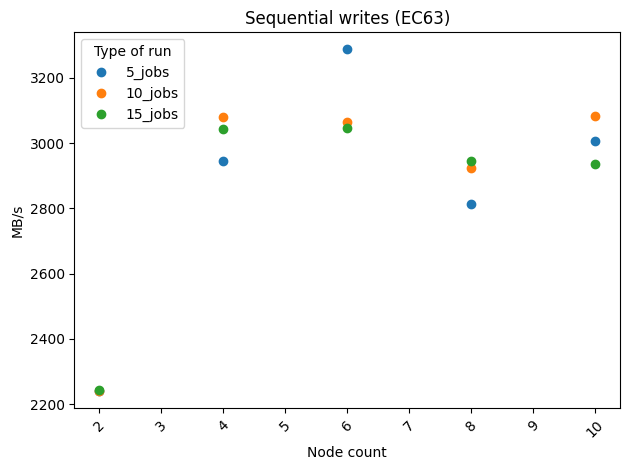

In [11]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/writes/EC63/5_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/writes/EC63/10_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/writes/EC63/15_jobs',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential writes (EC63)", 'write')

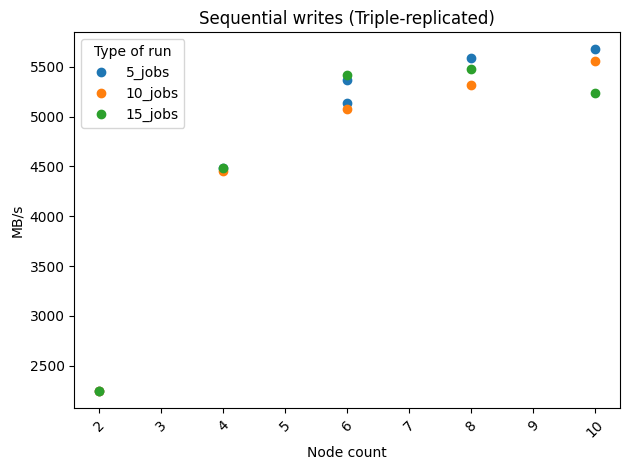

In [10]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/writes/triple_replicated/5_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/writes/triple_replicated/10_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/writes/triple_replicated/15_jobs',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential writes (Triple-replicated)", 'write')

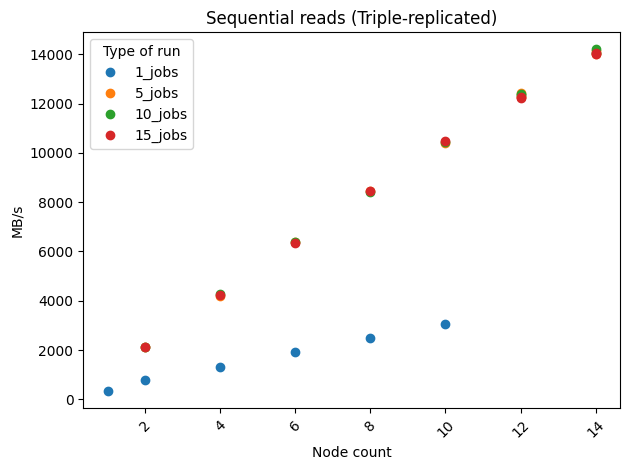

In [8]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/reads/triple_replicated/1_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/reads/triple_replicated/5_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/reads/triple_replicated/10_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/reads/triple_replicated/15_jobs',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential reads (Triple-replicated)", 'read')

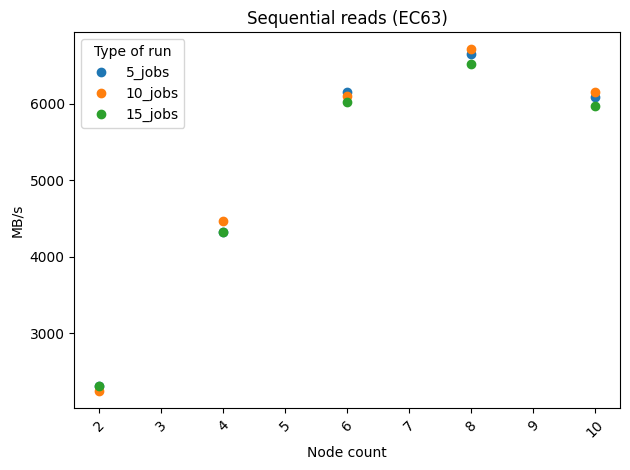

In [5]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/reads/EC63/5_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/reads/EC63/10_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/reads/EC63/15_jobs',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential reads (EC63)", 'read')

In [ ]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/1_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/5_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/10_jobs',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/15_jobs',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (triple replicated, 64K)", 'read')

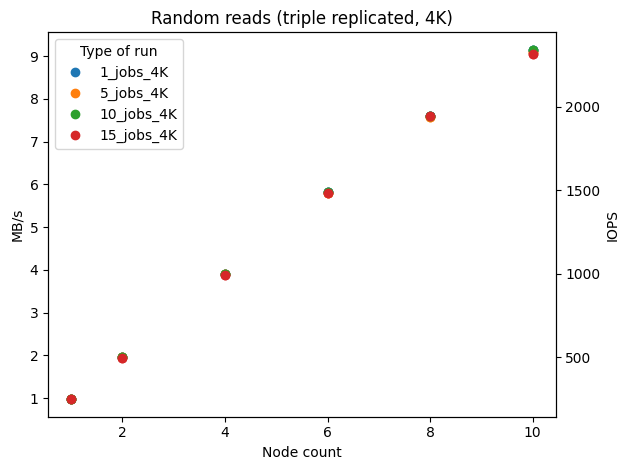

In [12]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/1_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/5_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/10_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/15_jobs_4K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (triple replicated, 4K)", 'read')

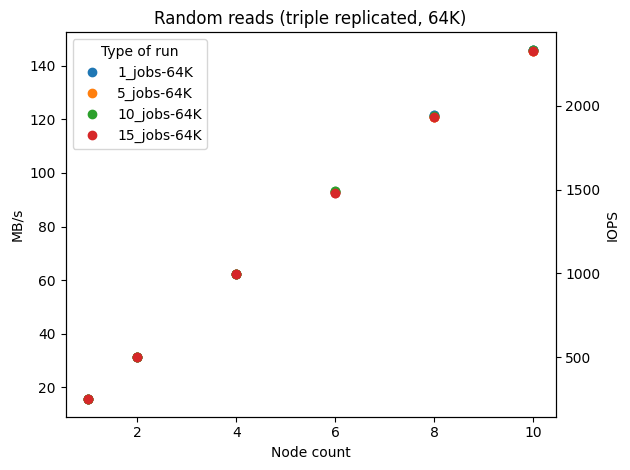

In [13]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/1_jobs-64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/5_jobs-64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/10_jobs-64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/15_jobs-64K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (triple replicated, 64K)", 'read')

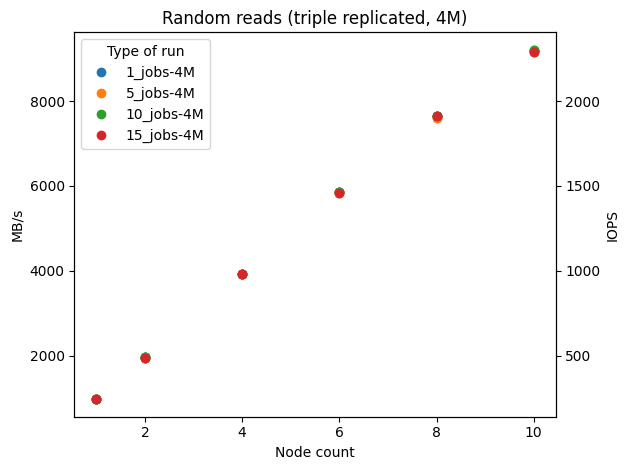

In [14]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/1_jobs-4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/5_jobs-4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/10_jobs-4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/triple_replicated/15_jobs-4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (triple replicated, 4M)", 'read')

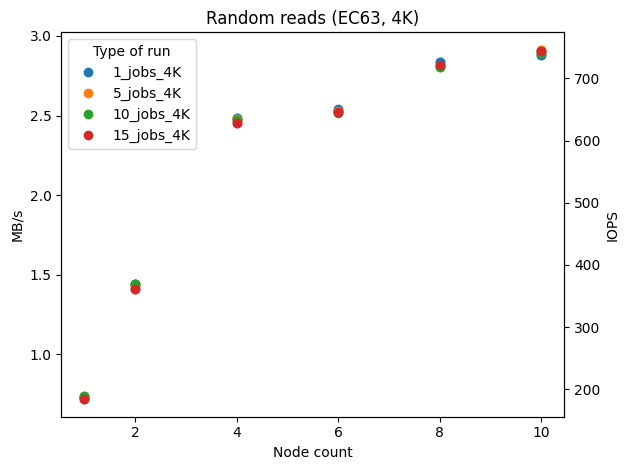

In [15]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/1_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/5_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/10_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/15_jobs_4K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (EC63, 4K)", 'read')

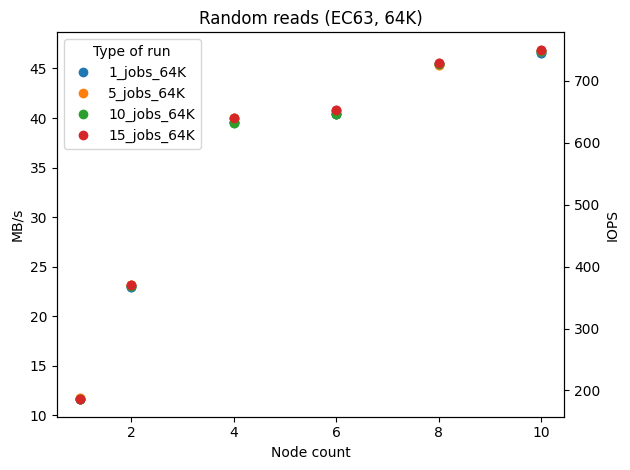

In [16]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/1_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/5_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/10_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/15_jobs_64K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (EC63, 64K)", 'read')

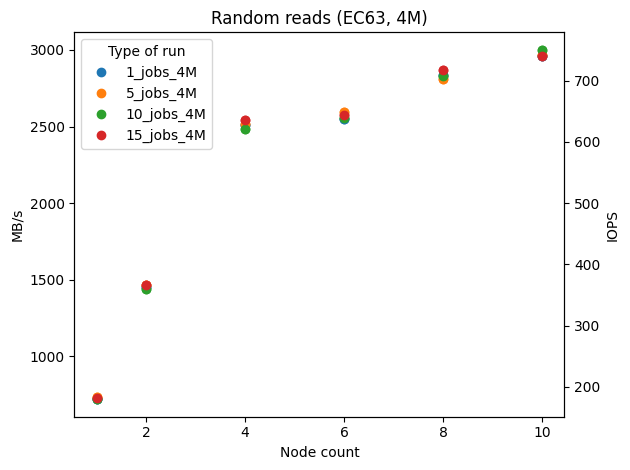

In [17]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randread/EC63/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random reads (EC63, 4M)", 'read')

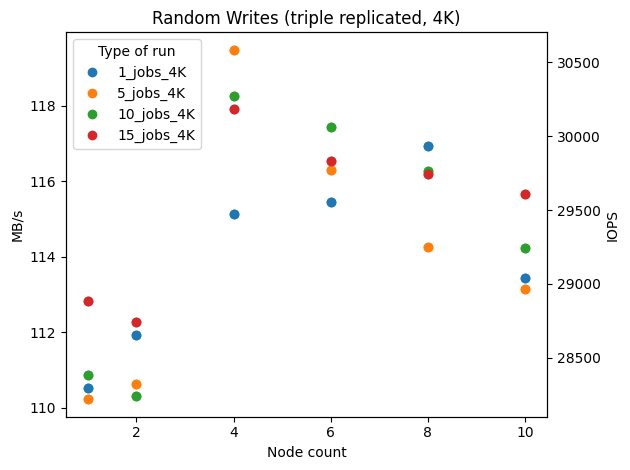

In [5]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/1_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/5_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/10_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/15_jobs_4K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (triple replicated, 4K)", 'write')

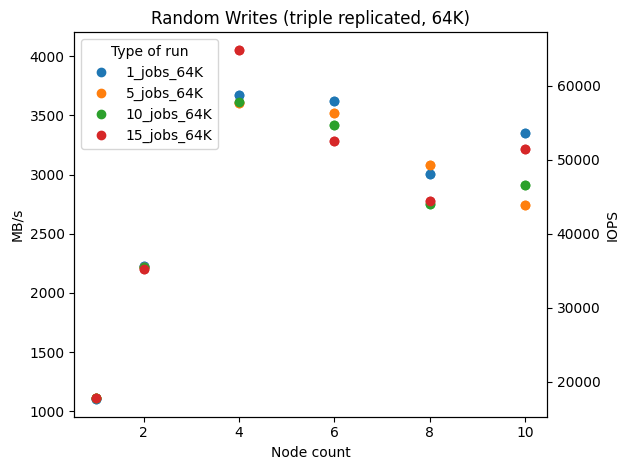

In [6]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/1_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/5_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/10_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/15_jobs_64K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (triple replicated, 64K)", 'write')

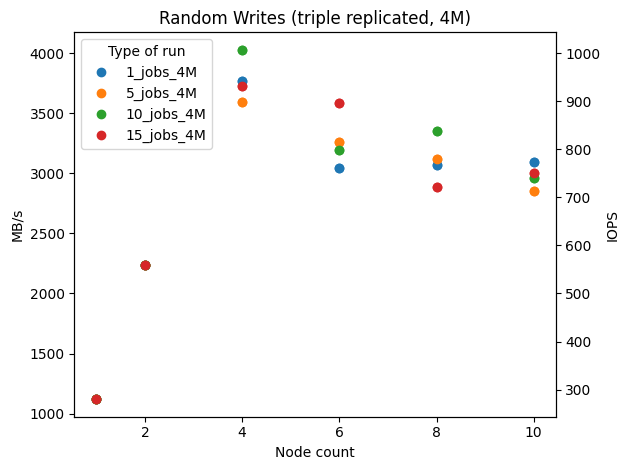

In [7]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/triple_replicated/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (triple replicated, 4M)", 'write')

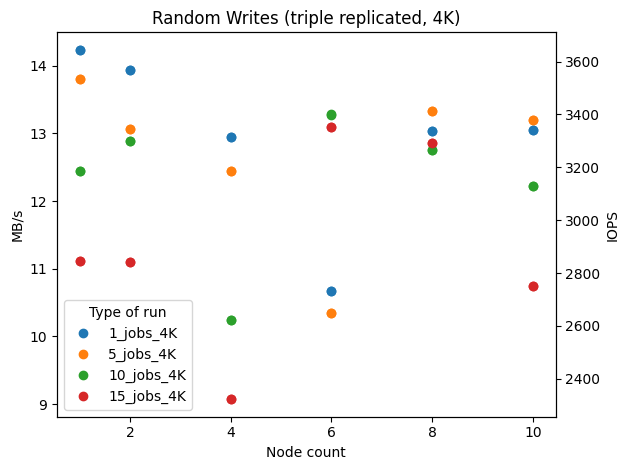

In [25]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/1_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/5_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/10_jobs_4K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/15_jobs_4K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (triple replicated, 4K)", 'write')

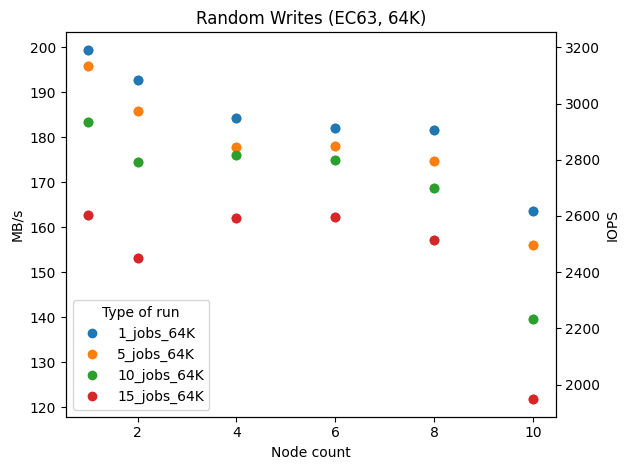

In [20]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/1_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/5_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/10_jobs_64K',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/15_jobs_64K',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (EC63, 64K)", 'write')

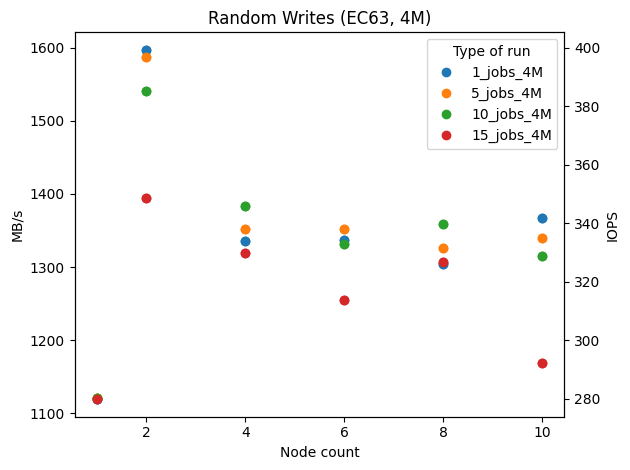

In [11]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/randwrite/EC63/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Random Writes (EC63, 4M)", 'write')

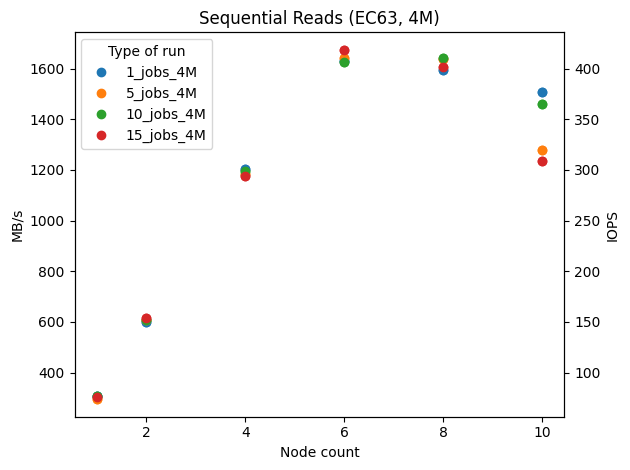

In [14]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/read/EC63/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/EC63/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/EC63/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/EC63/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential Reads (EC63, 4M)", 'read')

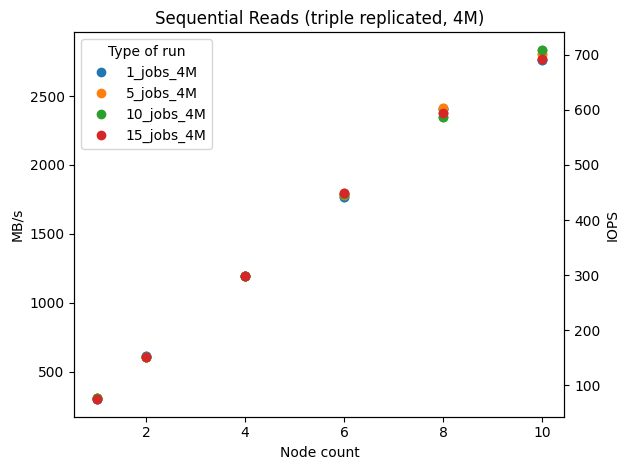

In [15]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/read/triple_replicated/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/triple_replicated/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/triple_replicated/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/read/triple_replicated/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential Reads (triple replicated, 4M)", 'read')

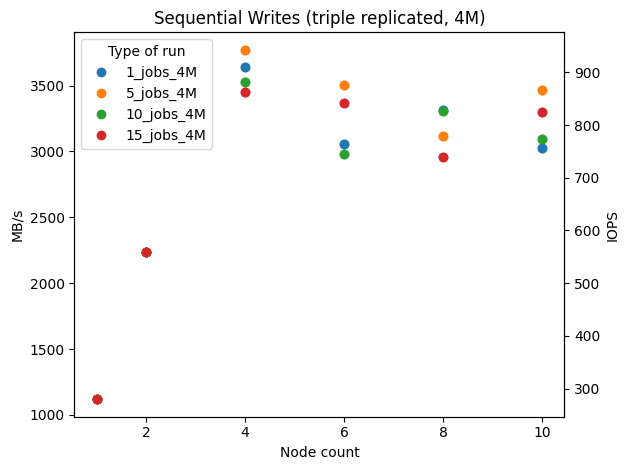

In [17]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/write/triple_replicated/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/triple_replicated/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/triple_replicated/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/triple_replicated/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential Writes (triple replicated, 4M)", 'write')

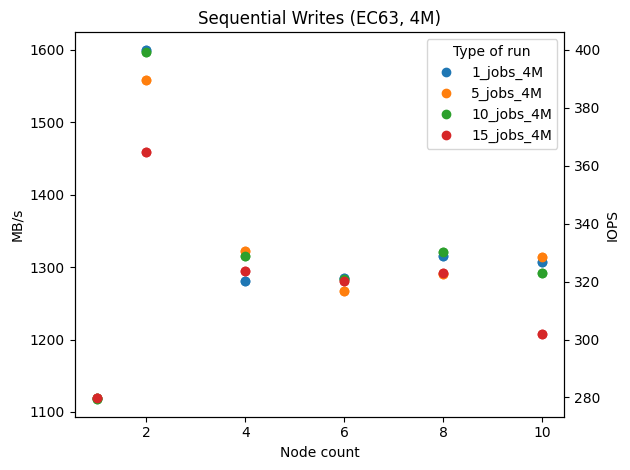

In [18]:
# Example Usage
json_data = {}
#directory_path = ['nikos_results/multinode_reads/10_cores_1_file_per_node', 'results/multinode_reads/10_cores_10_files_per_node', 'results/multinode_reads/20_cores_20_files_per_node'] # Change this to the path of your directory
directory_path = ['/mnt/home/skrit/Documents/benchmark_handler/results/write/EC63/1_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/EC63/5_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/EC63/10_jobs_4M',
                  '/mnt/home/skrit/Documents/benchmark_handler/results/write/EC63/15_jobs_4M',]
#directory_path = []
#directory_path.append('results/multinode_reads_1_file')

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    
    json_data[type_of_run] = load_json_files(item)

#plot_data(json_data)
plot_data(json_data, "Sequential Writes (EC63, 4M)", 'write')